In [3]:
! kaggle datasets download sakshigoyal7/credit-card-customers

Dataset URL: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
License(s): CC0-1.0
  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 123MB/s]


In [4]:
! unzip credit-card-customers.zip -d /content/credit-card-customers

Archive:  credit-card-customers.zip
  inflating: /content/credit-card-customers/BankChurners.csv  


In [5]:
import pandas as pd

data = pd.read_csv('/content/credit-card-customers/BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],
          inplace=True, errors='ignore')
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

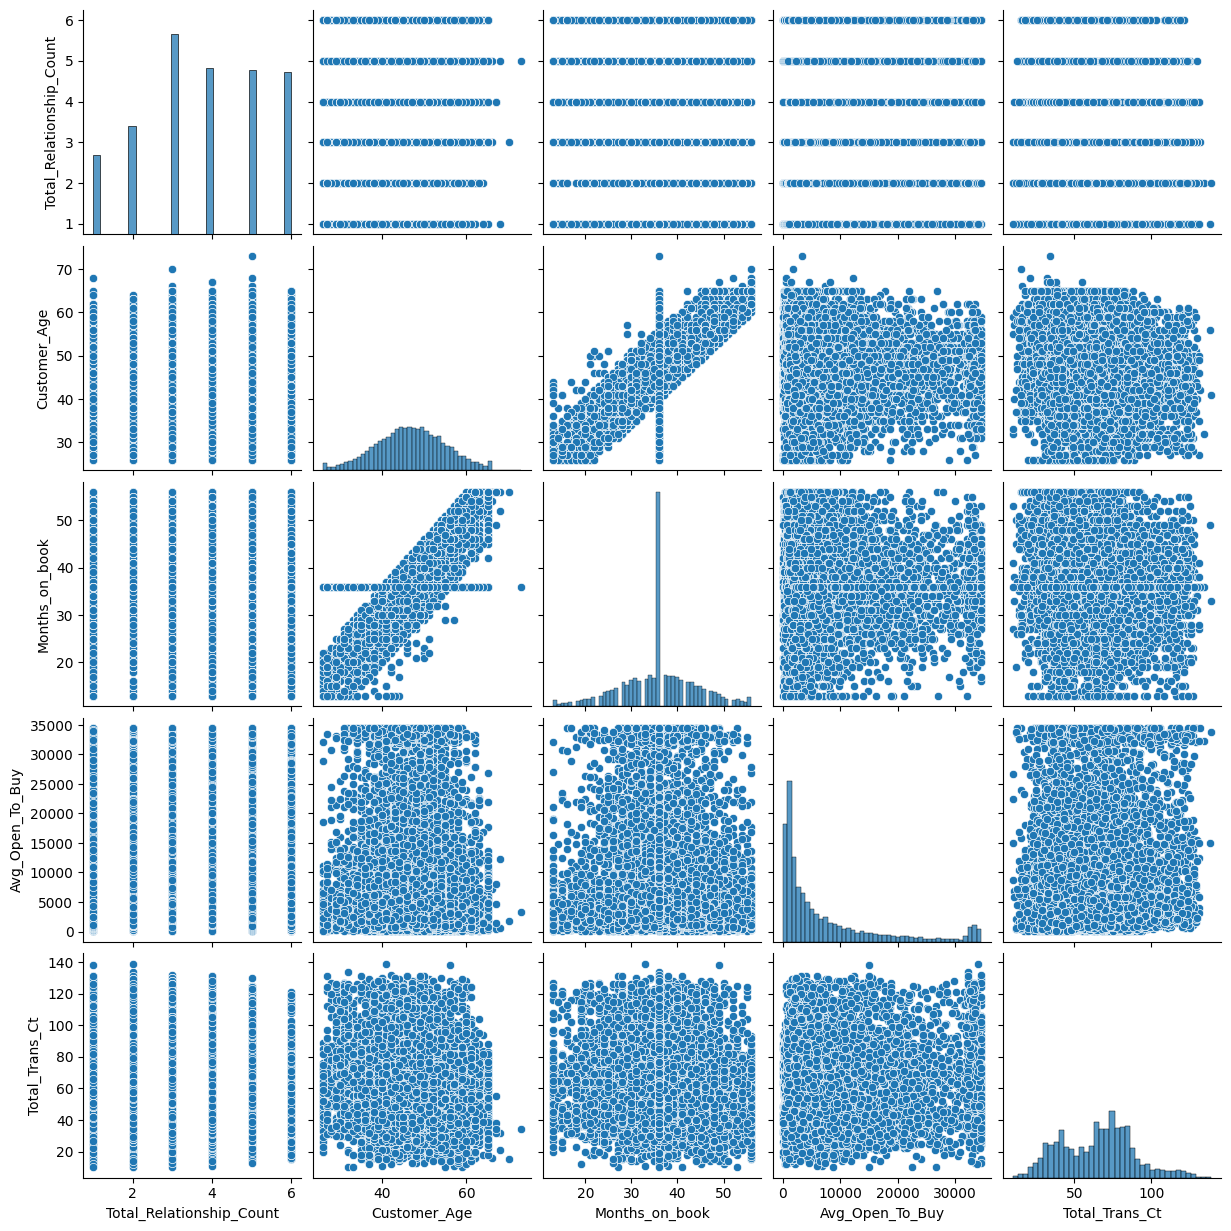

In [8]:
import seaborn as sns
sns.pairplot(data[['Total_Relationship_Count', 'Customer_Age', 'Months_on_book', 'Avg_Open_To_Buy', 'Total_Trans_Ct']])

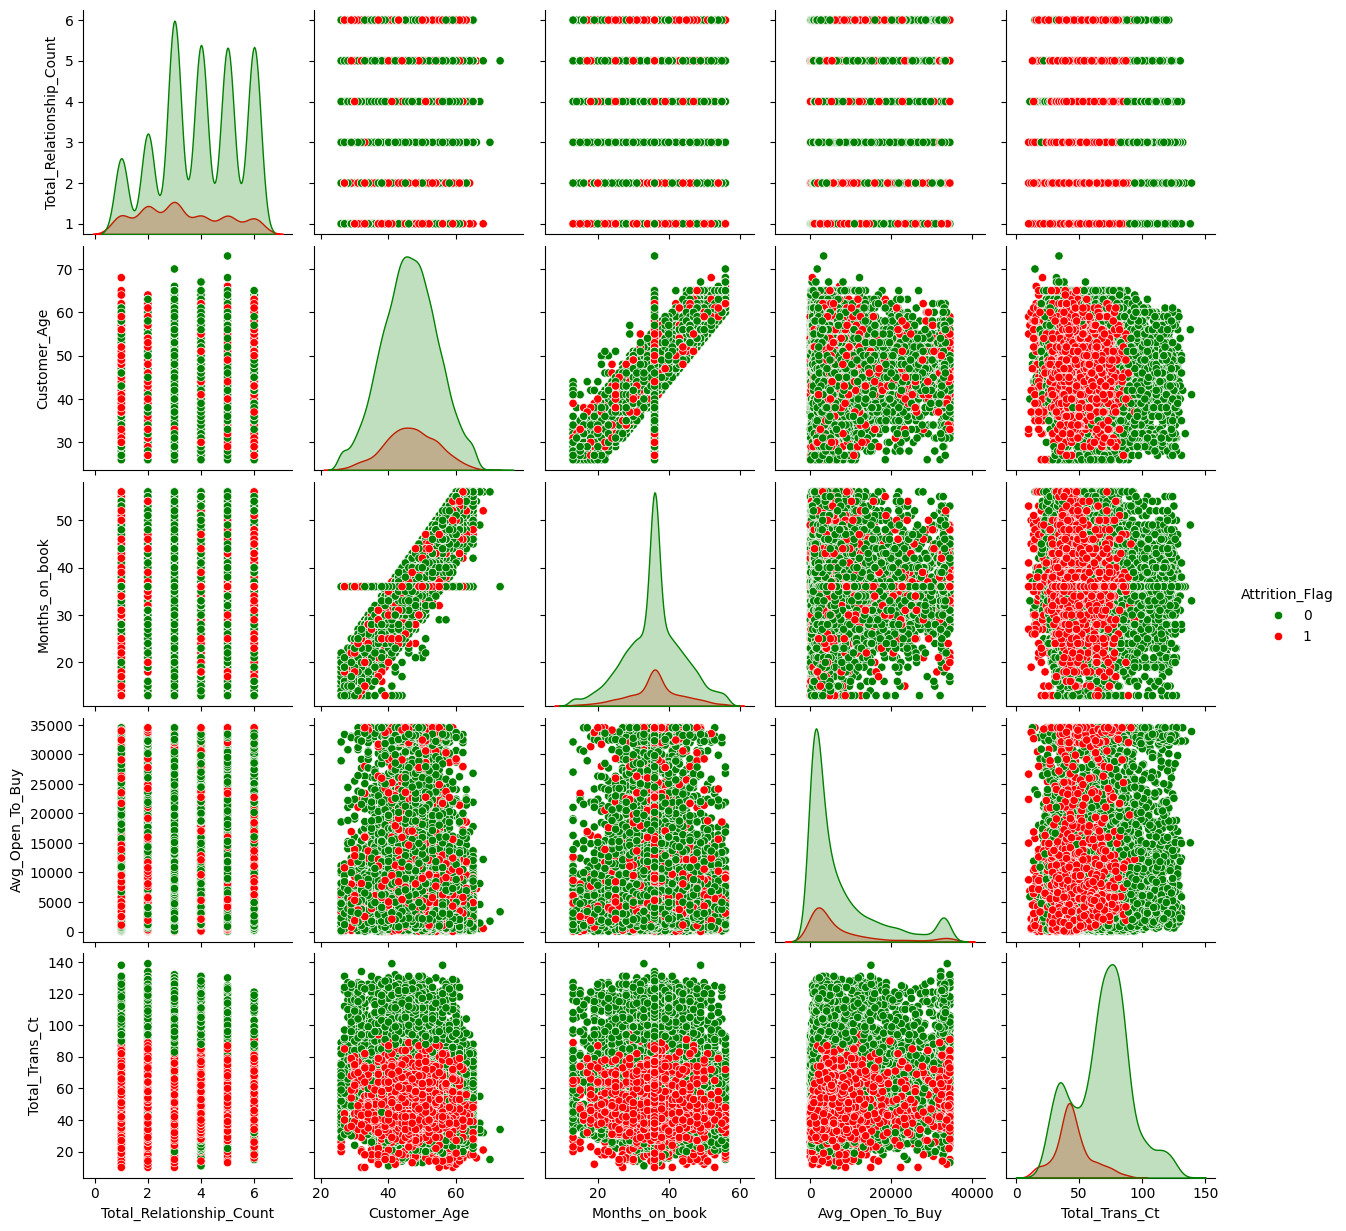

In [43]:

if 'Attrition_Flag' in data.columns:
    if data['Attrition_Flag'].isnull().any():
        data = data.dropna(subset=['Attrition_Flag'])

    sns.pairplot(data[['Total_Relationship_Count', 'Customer_Age', 'Months_on_book', 'Avg_Open_To_Buy', 'Total_Trans_Ct', 'Attrition_Flag']],
                 hue='Attrition_Flag',
                 palette={'Retained': 'green', 'Churned': 'black'} if data['Attrition_Flag'].dtype == 'object' else {0: 'green', 1: 'red'})
    plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder

replace_mappings = {
    'Gender': {'M': 1, 'F': 0},
    'Attrition_Flag': {'Existing Customer': 0, 'Attrited Customer': 1},
    'Education_Level': {
        'Unknown': 0, 'Uneducated': 1, 'High School': 2,
        'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6
    }
}

for column, mapping in replace_mappings.items():
    data[column] = data[column].replace(mapping)

columns_to_encode = ['Marital_Status', 'Income_Category', 'Card_Category']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

<ipython-input-12-7bbb2055e482>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace(mapping)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<Axes: >

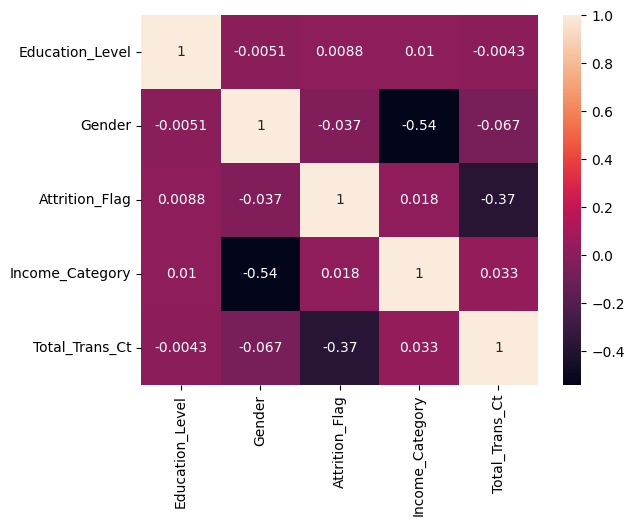

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = data[['Education_Level', 'Gender', 'Attrition_Flag', 'Income_Category', 'Total_Trans_Ct']].corr()
sns.heatmap(correlation, annot=True)

In [16]:
data.isna().values.any()

False

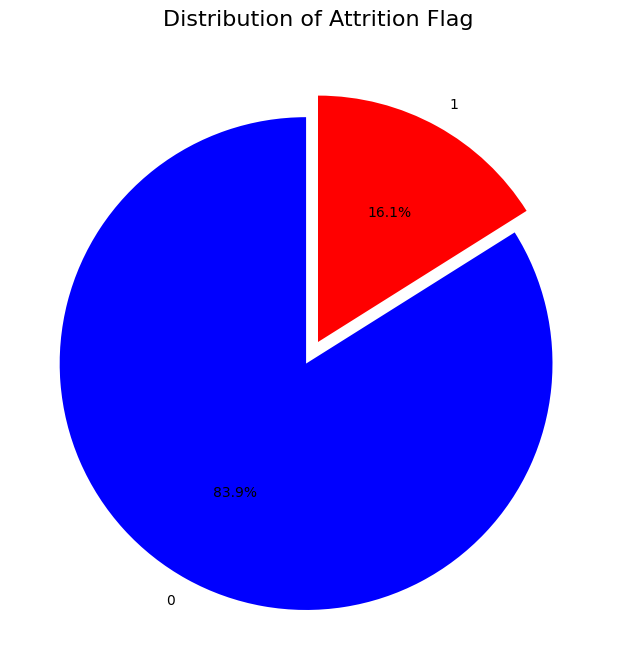

In [21]:
import matplotlib.pyplot as plt
category_counts = data['Attrition_Flag'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['blue', 'red'],
    explode=[0.1, 0]
)
plt.title('Distribution of Attrition Flag', fontsize=16)
plt.show()


Classification Report (Training):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7224
           1       1.00      1.00      1.00      1383

    accuracy                           1.00      8607
   macro avg       1.00      1.00      1.00      8607
weighted avg       1.00      1.00      1.00      8607



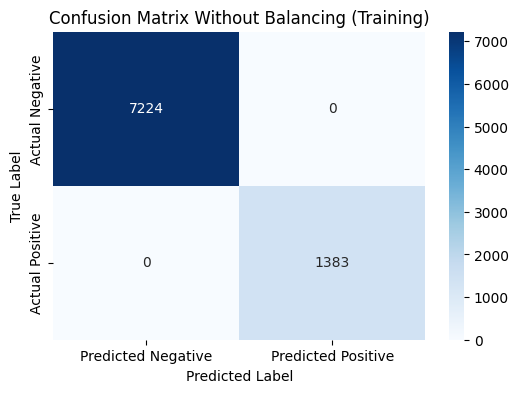


Classification Report (Testing):

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1030
           1       0.93      0.86      0.89       186

    accuracy                           0.97      1216
   macro avg       0.95      0.92      0.94      1216
weighted avg       0.97      0.97      0.97      1216



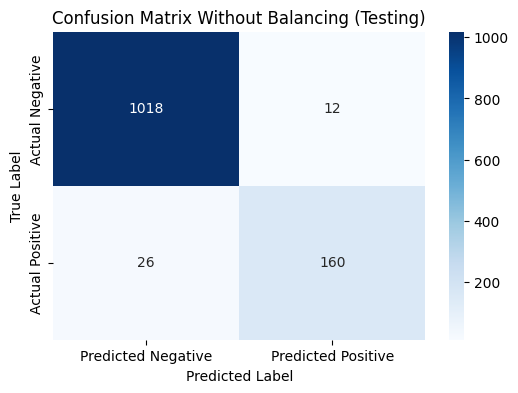


Classification Report (Validation):

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       246
           1       0.92      0.84      0.88        58

    accuracy                           0.96       304
   macro avg       0.94      0.91      0.93       304
weighted avg       0.96      0.96      0.96       304



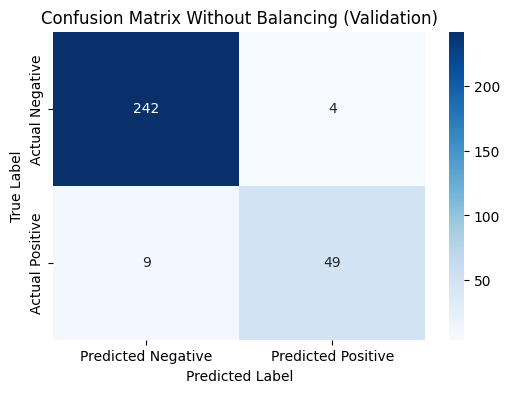


Accuracy Scores:
Training Accuracy: 1.00
Testing Accuracy: 0.97
Validation Accuracy: 0.96


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

Y = data.iloc[:, 1]
X = data.drop(columns=data.columns[1])
indices = Y.index

train_indices, test_indices = train_test_split(indices, test_size=0.15, stratify=Y, random_state=73)
X_train, Y_train = X.loc[train_indices], Y.loc[train_indices]
X_test, Y_test = X.loc[test_indices], Y.loc[test_indices]

test_indices, val_indices = train_test_split(test_indices, test_size=0.2, random_state=73)
X_test, Y_test = X.loc[test_indices], Y.loc[test_indices]
X_val, Y_val = X.loc[val_indices], Y.loc[val_indices]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=73, n_estimators=100)
rf_model.fit(X_train_scaled, Y_train)

Y_train_pred = rf_model.predict(X_train_scaled)
Y_test_pred = rf_model.predict(X_test_scaled)
Y_val_pred = rf_model.predict(X_val_scaled)

def report_and_plot(y_true, y_pred, title):
    print(f"\nClassification Report ({title}):\n")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix Without Balancing ({title})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

report_and_plot(Y_train, Y_train_pred, "Training")
report_and_plot(Y_test, Y_test_pred, "Testing")
report_and_plot(Y_val, Y_val_pred, "Validation")
train_acc = accuracy_score(Y_train, Y_train_pred)
test_acc = accuracy_score(Y_test, Y_test_pred)
val_acc = accuracy_score(Y_val, Y_val_pred)
print(f"\nAccuracy Scores:")
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")
print(f"Validation Accuracy: {val_acc:.2f}")


Classification Report (Training (Balanced)):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7224
           1       1.00      1.00      1.00      7224

    accuracy                           1.00     14448
   macro avg       1.00      1.00      1.00     14448
weighted avg       1.00      1.00      1.00     14448



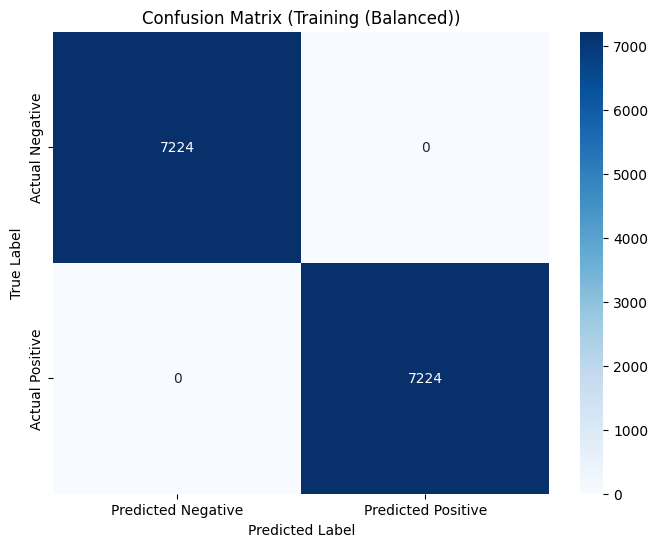


Classification Report (Testing):

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1021
           1       0.83      0.91      0.87       195

    accuracy                           0.95      1216
   macro avg       0.90      0.94      0.92      1216
weighted avg       0.96      0.95      0.96      1216



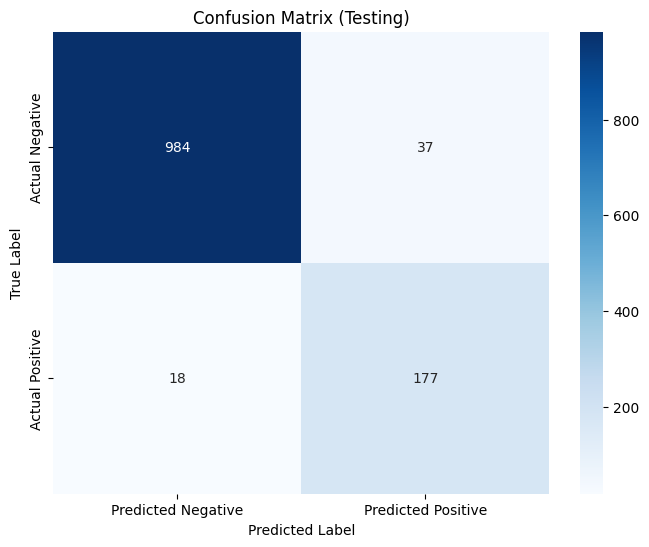


Classification Report (Validation):

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       255
           1       0.82      0.94      0.88        49

    accuracy                           0.96       304
   macro avg       0.90      0.95      0.93       304
weighted avg       0.96      0.96      0.96       304



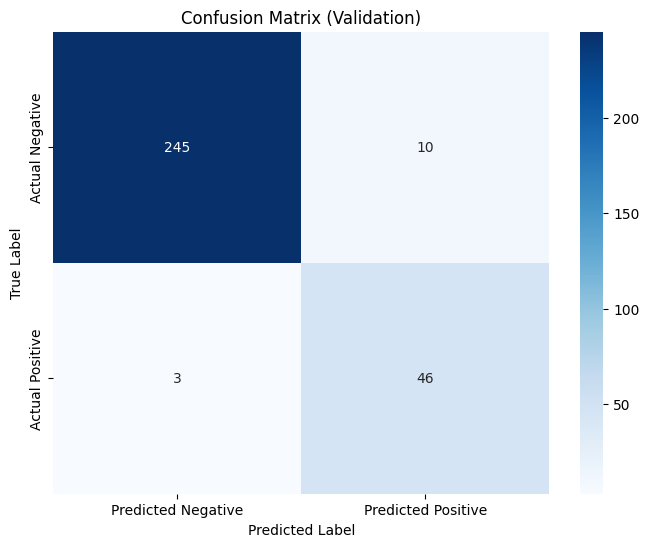


Accuracy Scores:
Training Accuracy (Balanced): 1.00
Testing Accuracy: 0.95
Validation Accuracy: 0.96


In [32]:
from imblearn.over_sampling import SMOTE

Y = data.iloc[:, 1]
X = data.drop(columns=data.columns[1])

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.15, stratify=Y, shuffle=True, random_state=73)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.2, stratify=Y_temp, shuffle=True, random_state=73)

smote = SMOTE(random_state=73)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=73, n_estimators=100)
rf_model.fit(X_train_scaled, Y_train_balanced)

Y_train_pred = rf_model.predict(X_train_scaled)
Y_test_pred = rf_model.predict(X_test_scaled)
Y_val_pred = rf_model.predict(X_val_scaled)

report_and_plot(Y_train_balanced, Y_train_pred, "Training (Balanced)")
report_and_plot(Y_test, Y_test_pred, "Testing")
report_and_plot(Y_val, Y_val_pred, "Validation")

train_acc = accuracy_score(Y_train_balanced, Y_train_pred)
test_acc = accuracy_score(Y_test, Y_test_pred)
val_acc = accuracy_score(Y_val, Y_val_pred)

print(f"\nAccuracy Scores:")
print(f"Training Accuracy (Balanced): {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")
print(f"Validation Accuracy: {val_acc:.2f}")